In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rawData = pd.read_csv('Google_hangouts_removeBadPackets.csv')

In [83]:
#print(rawData)
print("(rows,columns):",rawData.shape)

(rows,columns): (54255, 87)


In [16]:
# Get np array by columns
X = rawData.iloc[:,:86].values
Y = rawData.iloc[:,86].values.reshape((rawData.shape[0],1))
m = rawData.shape[0]
# Total length of flow in both direction
X_total_length_flow = np.array(rawData.loc[:,['TotLen Fwd Pkts','TotLen Bwd Pkts','Category']])
# Category and AppProtocol
X_category_AppProtocol = np.array(rawData.loc[:,['Category','App_protocol']])
# 5 tuples (IP,Port,Protocol)
X_five_tuples = np.array(rawData.loc[:,['Src IP','Src Port','Dst IP','Dst Port','Protocol']])
# Src IP and Dst IP
X_src_dst_IP = np.array(rawData.loc[:,['Src IP','Dst IP']])
#print(X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Web')])

#Scr IP, Dst IP, Category, App Protocol, Web Service
X_ip_label = np.array(rawData.loc[:,['Src IP','Dst IP','Category','App_protocol','Web_service']])

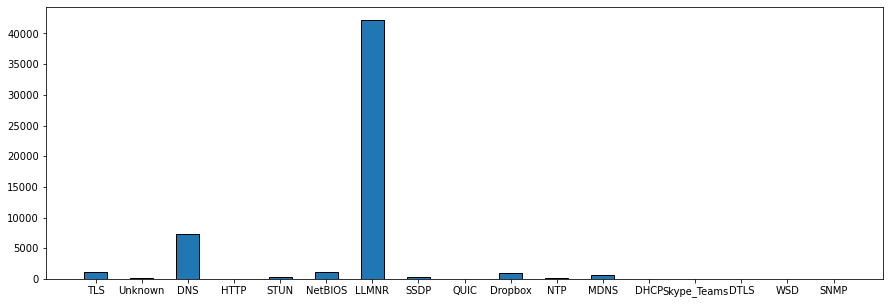

In [5]:
# plot App_protocol
X_AppProtocol = X_category_AppProtocol[:,1].reshape(m,1)
X_appProtocol_labels = np.unique(X_AppProtocol)
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(X_AppProtocol,rwidth=0.5,bins=np.arange(-0.5,len(X_appProtocol_labels)),edgecolor='black')

plt.show()

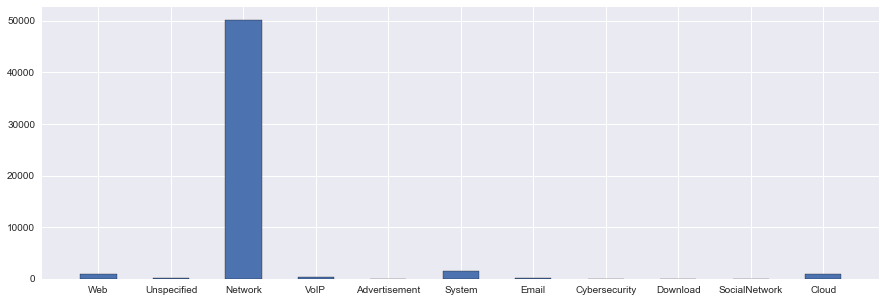

In [29]:
# plot category
plt.style.use('seaborn')

X_category = X_category_AppProtocol[:,0]
X_category = X_category.reshape(X_category.shape[0],1)
x_category_labels = np.unique(X_category)

fig, ax = plt.subplots(figsize=(15,5))

ax.hist(X_category,rwidth=0.5,bins=np.arange(-0.5,len(x_category_labels)),edgecolor='black')

plt.show()

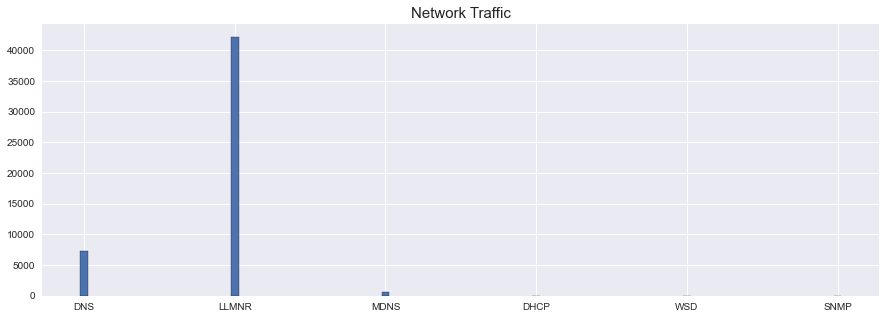

In [7]:
# plot what app protocols the network traffic use
x_network_appProtocol = X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Network')]
x_network_appProtocol = x_network_appProtocol[:,1]
x_network_appProtocol = x_network_appProtocol.reshape(x_network_appProtocol.shape[0],1)
x_network_app_labels = np.unique(x_network_appProtocol)



fig, ax = plt.subplots(figsize=(15,5))

ax.hist(x_network_appProtocol,rwidth=0.05,bins=np.arange(-0.5,len(x_network_app_labels)),edgecolor='black')
ax.set_title("Network Traffic",fontsize=15)
plt.show()

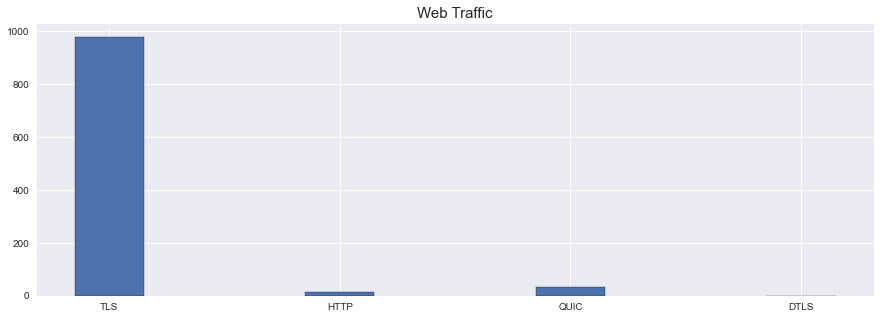

In [8]:
# plot what app protocols the web traffic use
x_network_appProtocol = X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Web')]
x_network_appProtocol = x_network_appProtocol[:,1]
x_network_appProtocol = x_network_appProtocol.reshape(x_network_appProtocol.shape[0],1)
x_network_app_labels = np.unique(x_network_appProtocol)


fig, ax = plt.subplots(figsize=(15,5))

ax.hist(x_network_appProtocol,rwidth=0.3,bins=np.arange(-0.5,len(x_network_app_labels)),edgecolor='black')
ax.set_title("Web Traffic",fontsize=15)
plt.show()

In [9]:
# normalizing total length of forward and backward flows
X_network_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Network')]

m = X_network_length_flow.shape[0]
X_network_length_flow_norm_forward =  X_network_length_flow[:,0] / X_network_length_flow[:,0].max(axis=0)
X_network_length_flow_norm_forward = X_network_length_flow_norm_forward.reshape(m,1)

X_network_length_flow_norm_backward = X_network_length_flow[:,1] / X_network_length_flow[:,1].max(axis=0)
X_network_length_flow_norm_backward = X_network_length_flow_norm_backward.reshape(m,1)

X_network_length_flow_norm = np.concatenate((X_network_length_flow_norm_forward,X_network_length_flow_norm_backward),axis=1)
X_network_length_flow_norm = np.concatenate((X_network_length_flow_norm,X_network_length_flow[:,2].reshape(m,1)),axis=1)

[[38.0 378.0 'Network']
 [32.0 248.0 'Network']
 [36.0 235.0 'Network']
 ...
 [44.0 0.0 'Network']
 [44.0 0.0 'Network']
 [44.0 0.0 'Network']]


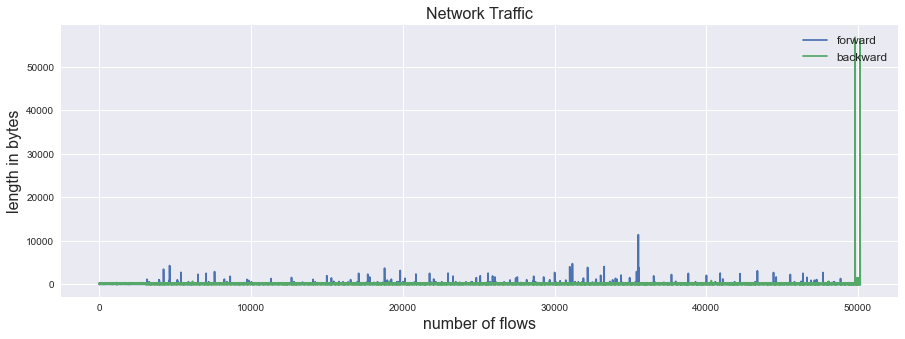

In [10]:
# plot total length of forward and backward flow in network traffic
#X_network_length_flow = X_network_length_flow_norm
X_network_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Network')]
print(X_network_length_flow)
flow = ['forward','backward']

fig, ax = plt.subplots(figsize=(15,5))
for i in range(2):
    plt.plot(X_network_length_flow[:,i],label= flow[i])
    
plt.ylabel('length in bytes',fontsize=16)
plt.xlabel('number of flows',fontsize=16)
plt.title('Network Traffic',fontsize=16)
legend = plt.legend(loc='upper right',fontsize=12 ,shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

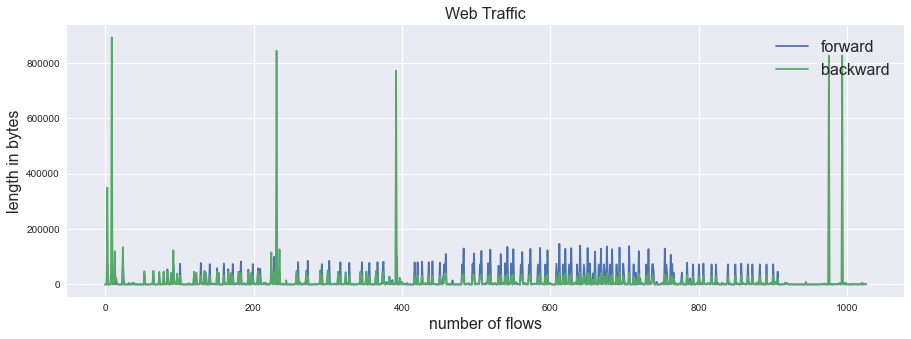

In [11]:
# plot total length of forward and backward flow in web traffic
X_web_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Web')]
fig, ax = plt.subplots(figsize=(15,5))
for i in range(2):
    plt.plot(X_web_length_flow[:,i],label= flow[i])
    
plt.ylabel('length in bytes',fontsize=16)
plt.xlabel('number of flows',fontsize=16)
plt.title('Web Traffic',fontsize=16)
legend = plt.legend(loc='upper right',fontsize=16 ,shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [12]:
# Analayzing the network at social level - Popularity of hosts
x_src_ip_port = X_five_tuples[:,:2]
X_dst_ip_port = X_five_tuples[:,2:4]
# remove all 0.0.0.0, 255.255.255.255 ip
X_src_des_ip_remove = X_src_dst_IP[np.where((X_src_dst_IP[:,0] != '0.0.0.0') & (X_src_dst_IP[:,1] != '0.0.0.0') &
                                           (X_src_dst_IP[:,0] != '255.255.255.255') & (X_src_dst_IP[:,1] != '255.255.255.255'))]
count, unique = np.unique(X_src_des_ip_remove,return_counts=True)
unique = unique.reshape(unique.shape[0],1)
count = count.reshape(count.shape[0],1)
X_src_des_ip_count = np.concatenate((unique,count),axis=1)
X_src_des_ip_count = X_src_des_ip_count[X_src_des_ip_count[:,0].argsort()]
print(X_src_des_ip_remove.shape)

(53550, 2)


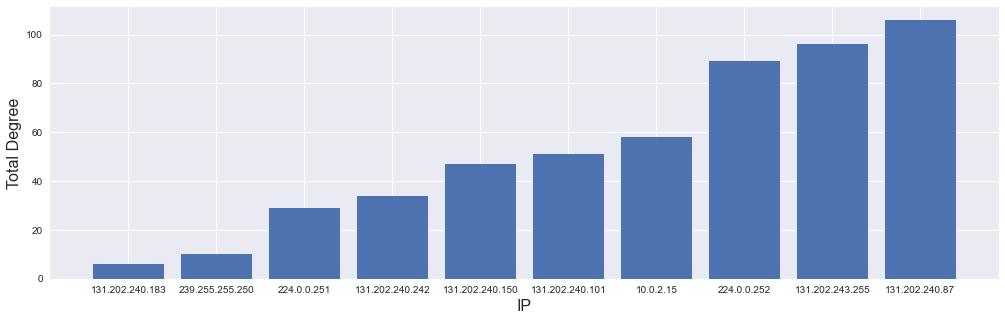

[[234 1 5 6 '131.202.240.183']
 [154 10 0 10 '239.255.255.250']
 [567 29 0 29 '224.0.0.251']
 [1062 11 23 34 '131.202.240.242']
 [3430 6 41 47 '131.202.240.150']
 [4703 5 46 51 '131.202.240.101']
 [482 9 49 58 '10.0.2.15']
 [42194 89 0 89 '224.0.0.252']
 [1532 96 0 96 '131.202.243.255']
 [921 34 72 106 '131.202.240.87']]


In [77]:
graph = {}
for row in X_src_des_ip_remove:
    if row[0] not in graph:
        graph[row[0]] = {'in':set(),'out':set()}
        
    if row[1] not in graph[row[0]]['out']:
        graph[row[0]]['out'].add(row[1])
    
    if row[1] not in graph:
        graph[row[1]] = {'in':set(),'out':set()}
    
    if row[0] not in graph[row[1]]['in']:
        graph[row[1]]['in'].add(row[0])

X_src_des_degree_count = []
for row in X_src_des_ip_count:
    if row[1] in graph:
        r = np.insert(row,1,len(graph[row[1]]['in']))
        r = np.insert(r,2,len(graph[row[1]]['out']))
        r = np.insert(r,3,len(graph[row[1]]['in']) + len(graph[row[1]]['out']))
        X_src_des_degree_count.append(r)
        
# 0: occurrence, 1: in_degree, 2: out_degree, 3: total degree, 4: ip     
X_src_des_degree_count = np.array(X_src_des_degree_count)
# sort by total degree
X_src_des_degree_count = X_src_des_degree_count[X_src_des_degree_count[:,3].argsort()]
# sort by occurrence
X_src_des_occurrence_count = X_src_des_degree_count[X_src_des_degree_count[:,0].argsort()]

# dimension
degree_count_m = X_src_des_degree_count.shape[0]
degree_count_n = X_src_des_degree_count.shape[1]

# Get 10 most popular IPs
X_src_des_degree_count_10 = X_src_des_degree_count[degree_count_m - 10:]
fig, ax = plt.subplots(figsize=(17,5))
plt.bar(X_src_des_degree_count_10[:,4],X_src_des_degree_count_10[:,3],align='center')
plt.xlabel('IP',fontsize=16)
plt.ylabel('Total Degree',fontsize=16)

plt.show()
print(X_src_des_degree_count_10)

[[2118 4 0 4 '131.202.244.3']
 [3430 6 41 47 '131.202.240.150']
 [4603 0 2 2 '131.202.243.49']
 [4703 5 46 51 '131.202.240.101']
 [4780 4 0 4 '131.202.244.5']
 [5320 0 2 2 '131.202.240.90']
 [6925 0 2 2 '131.202.240.185']
 [7612 0 2 2 '131.202.242.93']
 [12954 0 2 2 '131.202.243.9']
 [42194 89 0 89 '224.0.0.252']]


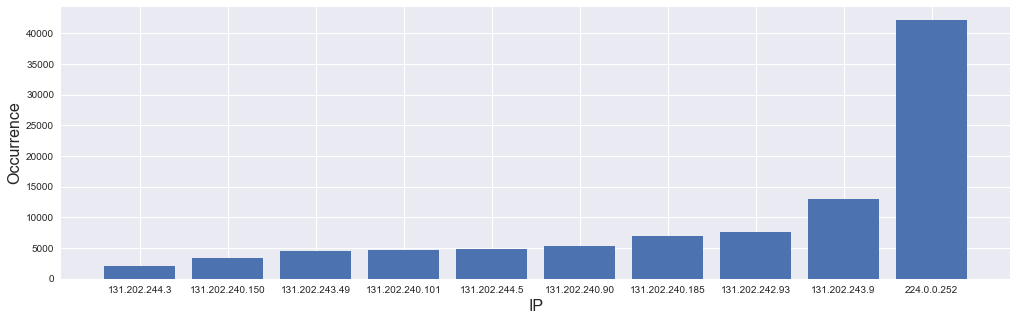

In [81]:
print(X_src_des_occurrence_count_10)
X_src_des_occurrence_count_10 = X_src_des_occurrence_count[degree_count_m-10:]
fig, ax = plt.subplots(figsize=(17,5))
plt.bar(X_src_des_occurrence_count_10[:,4],X_src_des_occurrence_count_10[:,0],align='center')
plt.xlabel('IP',fontsize=16)
plt.ylabel('Occurrence',fontsize=16)

plt.show()

In [75]:
# show category counts with 10 most popular IP
ips = X_src_des_degree_count_10[:,4]
for ip in ips:
    a = X_ip_label[np.where((X_ip_label[:,0] == ip) | (X_ip_label[:,1] == ip))]
    a_category,counts = np.unique(a[:,4],return_counts=True)
    total = np.sum(counts)
    longest_length = max(len(x) for x in a_category)
    print("Category count with IP = {}".format(ip))
    for i in range(len(counts)):
        print("{}: {:{pad}} {}%".format(a_category[i],counts[i],round((counts[i] / total) * 100,2),pad=longest_length-len(a_category[i])+5))
    print()
    

Category count with IP = 131.202.244.3
Cybersec:       8 0.38%
GMail:         36 1.7%
Google:      1188 56.09%
GooglePlus:   844 39.85%
Microsoft:      4 0.19%
Unknown:       34 1.61%
YouTube:        4 0.19%

Category count with IP = 131.202.240.150
GMail:              115 3.35%
Google:            1666 48.57%
GoogleHangoutDuo:   112 3.27%
GooglePlus:        1242 36.21%
SMBv1:               21 0.61%
SMBv23:               1 0.03%
Skype_Teams:          2 0.06%
Skype_TeamsCall:      1 0.03%
Unknown:            270 7.87%

Category count with IP = 131.202.243.49
Unknown:  4603 100.0%

Category count with IP = 131.202.240.101
GMail:               79 1.68%
Google:            2585 54.96%
GoogleHangoutDuo:   172 3.66%
GooglePlus:        1765 37.53%
Skype_Teams:          4 0.09%
Skype_TeamsCall:      1 0.02%
Unknown:             97 2.06%

Category count with IP = 131.202.244.5
Cybersec:        2 0.04%
GMail:          67 1.4%
Google:       2613 54.55%
GooglePlus:   2000 41.75%
Microsoft:       3 0

In [82]:
# show category counts with 10 most occurrence IP
ips = X_src_des_occurrence_count_10[:,4]
for ip in ips:
    a = X_ip_label[np.where((X_ip_label[:,0] == ip) | (X_ip_label[:,1] == ip))]
    a_category,counts = np.unique(a[:,4],return_counts=True)
    total = np.sum(counts)
    longest_length = max(len(x) for x in a_category)
    print("Category count with IP = {}".format(ip))
    for i in range(len(counts)):
        print("{}: {:{pad}} {}%".format(a_category[i],counts[i],round((counts[i] / total) * 100,2),pad=longest_length-len(a_category[i])+5))
    print()

Category count with IP = 131.202.244.3
Cybersec:       8 0.38%
GMail:         36 1.7%
Google:      1188 56.09%
GooglePlus:   844 39.85%
Microsoft:      4 0.19%
Unknown:       34 1.61%
YouTube:        4 0.19%

Category count with IP = 131.202.240.150
GMail:              115 3.35%
Google:            1666 48.57%
GoogleHangoutDuo:   112 3.27%
GooglePlus:        1242 36.21%
SMBv1:               21 0.61%
SMBv23:               1 0.03%
Skype_Teams:          2 0.06%
Skype_TeamsCall:      1 0.03%
Unknown:            270 7.87%

Category count with IP = 131.202.243.49
Unknown:  4603 100.0%

Category count with IP = 131.202.240.101
GMail:               79 1.68%
Google:            2585 54.96%
GoogleHangoutDuo:   172 3.66%
GooglePlus:        1765 37.53%
Skype_Teams:          4 0.09%
Skype_TeamsCall:      1 0.02%
Unknown:             97 2.06%

Category count with IP = 131.202.244.5
Cybersec:        2 0.04%
GMail:          67 1.4%
Google:       2613 54.55%
GooglePlus:   2000 41.75%
Microsoft:       3 0